![title](http://portal.fbuni.edu.br/images/FB-UNI-colorida-300px.png)

# Trabalho Para Extra de Inteligência Artificial

* **Prof. Cleilton Lima Rocha**


Para este trabalho vamos usar o [Data Set do Titanic disponível no Kaggle](https://www.kaggle.com/c/titanic).  

Vamos criar uma análise explorátoria sobre o dataset do Titanic utilizando a implementação Aprendizagem não supervisionada. Mas antes disso vamos realizar algumas atividades tais o processo de pré-processamento dos dados (Se você fez essa atividade no trabalho de classificação pode aproveitar o mesmo código).


## O Dicionário de Dados

* **Survival**: Sobrevivente (Não=0,Sim=1)
* **Pclass**: Classe de ingresso (1=1st,2=2nd,3=3rd)
* **Sex**: Sexo
* **Age**: Idade em anos
* **Sibsp**: Quantidade de irmãos ou cônjuge a bordo do Titanic
* **Parch**: Quantidade de pais ou filhos a bordo do Titanic
* **Ticket**: Número do ticket
* **Fare**: Tarifa do passageiro
* **Cabin**: Número da cabine	
* **Embarked**: Portão de Embarque (C=Cherbourg, Q=Queenstown, S=Southampton)

Boa trabalho e hands on!

**PS.:**
* Se houver indícios de cola os alunos terão sua nota zerada.
* Quando houver necessidade de utilizar o random_state defina o valor 100
* Envie o código fonte e o report (File ==> Download As ==> Html), com seu nome

#### Aluno: Ernesto Gurgel Valente Neto
#### Matricula: 1020157
#### Turma I.A 2020
#### Trabalho para nota da V2

#### Import as bibliotecas

In [1]:
#Importando o dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Acesse os dados disponíveis em titanic_train.csv

In [2]:
df = pd.read_csv('C:/Users/Ernesto/Downloads/Trabalho_IA_VS/titanic_train.csv')

#### Aplique pré-processamento sobre os dados para criar seu dataset alvo, se você julgar necessário. 
   * Sugestões:
       * Preenchimento do atributo idade com a mediana. **Dica** use as funções fillna() ou apply()
       * Remova os seguintes atributos: Name, Ticket, PassengerId e Cabin. **Dica:** use a função drop, por exemplo, df.drop(['colunas'],axis=1,inplace=True)
       * Aplique o processo de *OneHotEncoding* para os atributos *Sex*, *Embarked* e *PClass*, visualize como os seus dados ficaram. Veja a dica abaixo:

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df.describe()) 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
df.drop(['Name'],axis=1,inplace=True)

In [6]:
df.drop(['Ticket'],axis=1,inplace=True)

In [7]:
df.drop(['PassengerId'],axis=1,inplace=True)

In [8]:
df.drop(['Cabin'],axis=1,inplace=True)

In [9]:
df.isnull().values.any()

True

In [10]:
print("# Quantidade de rows no dataframe {0}".format(len(df)))

# Quantidade de rows no dataframe 891


In [11]:
dfTeste = df
dfTeste.dropna(inplace=True)

In [12]:
print("# Quantidade de rows no dataframe {0}".format(len(dfTeste)))

# Quantidade de rows no dataframe 712


## Escolher remover ou não as linhas nulas?

### Nota: Caso tente-se realizar um drop em valores nulos antes de remover algumas linhas do dataset o valor total de rows ira cair de 891 para 188 (havendo muita perda), melhor opção é remover algumas das linhas (que talvez causariam menos impacto, tais como: Sex, Name, PassengerId, Cabin) para reduzir a quantidade de valores nulos.

In [13]:
df.dropna(inplace=True)
print("# Quantidade de rows no dataframe {0}".format(len(df)))

# Quantidade de rows no dataframe 712


In [14]:
#Verificação se ainda existem valores falsos
df.isnull().values.any()

False

In [15]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
#Convertendo os tipos para 1 homem e 2 mulher para que possam ser aplicados no algoritimo como passagem numerica
df.Sex[df.Sex == 'male'] = 1
df.Sex[df.Sex == 'female'] = 2

In [17]:
# (1=Cherbourg, 2=Queenstown, 3=Southampton)
df.Embarked[df.Embarked == 'C'] = 1
df.Embarked[df.Embarked == 'Q'] = 2
df.Embarked[df.Embarked == 'S'] = 3

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,3
1,1,1,2,38.0,1,0,71.2833,1
2,1,3,2,26.0,0,0,7.9250,3
3,1,1,2,35.0,1,0,53.1000,3
4,0,3,1,35.0,0,0,8.0500,3


#### Aplique o algoritmo [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), sobre o dataset criado. 

* **Antes de aplicar o K-means remova o atributo Survived do dataset, ou não o considere para criação dos grupos**

- Dicas: 
    * Julgue a necessidade de aplicar [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) ou não. Veja mais em nota, no final do exercício.
    * Aplique a [normalização](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), se for utilizar o PCA.
    * Se for aplicar o PCA utilize o fit_transform() para facilitar sua vida
    * Para reverter os valores em alguma análise considere reverter os valores utilizando o método inverse_transform() do pipeline criado

In [19]:
# Importando os arquivos
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#importando sklearn
from sklearn.datasets import make_blobs

In [20]:
df.drop(['Survived'],axis=1,inplace=True)

In [21]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,2,38.0,1,0,71.2833,1
2,3,2,26.0,0,0,7.9250,3
3,1,2,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


In [22]:
dfBackUp= df

In [23]:
print(df.describe())

           Pclass         Age       SibSp       Parch        Fare
count  712.000000  712.000000  712.000000  712.000000  712.000000
mean     2.240169   29.642093    0.514045    0.432584   34.567251
std      0.836854   14.492933    0.930692    0.854181   52.938648
min      1.000000    0.420000    0.000000    0.000000    0.000000
25%      1.000000   20.000000    0.000000    0.000000    8.050000
50%      2.000000   28.000000    0.000000    0.000000   15.645850
75%      3.000000   38.000000    1.000000    1.000000   33.000000
max      3.000000   80.000000    5.000000    6.000000  512.329200


In [24]:
print(df.corr())

          Pclass       Age     SibSp     Parch      Fare
Pclass  1.000000 -0.365902  0.065187  0.023666 -0.552893
Age    -0.365902  1.000000 -0.307351 -0.187896  0.093143
SibSp   0.065187 -0.307351  1.000000  0.383338  0.139860
Parch   0.023666 -0.187896  0.383338  1.000000  0.206624
Fare   -0.552893  0.093143  0.139860  0.206624  1.000000


In [25]:
#Copiar Df para montar o radarchart
dfCopy = df

In [26]:
# teste de criação de clusters
# criando os arquivos de data e os clusters
# Create Data
data = make_blobs(n_samples=200, n_features=7, 
                           centers=4, cluster_std=1.8,random_state=101)

In [27]:
# Definindo a quantidade de clusters
# Depois de varias analises de processamento de dados o numero de clusters escolhidos será 2
# definição do objeto
kmeans = KMeans(n_clusters=2)

In [28]:
# chamada e passagem do conjunto de dados para a função kmeans
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
kmeanCentro = kmeans.cluster_centers_

#### Aplique o método da [silhueta](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score) e verifique a qualidade do cluster gerado
 - Dicas: No método da silhueta você deve considerar kmeans_.predict(data) como sendo os **labels**

In [30]:
preds = kmeans.predict(df)
silhouette_score(df,preds)

0.7941508559940528

 #### Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da silhueta.

In [31]:
for k in range(2, 10):
    kmeans_ = KMeans(n_clusters=k, random_state=10)
    kmeans_.fit(data[0])
    print(k, silhouette_score(data[0], kmeans_.predict(data[0])))

2 0.4540677036976192
3 0.4961345623770297
4 0.5423759058323676
5 0.4448183779316148
6 0.35374881854099327
7 0.25020125109688723
8 0.15439756910325844
9 0.1440632987235963


**Varie o número de K, hiper parâmetro do K-Means e identifique o melhor valor considerando o método da curva do cotovelo, [veja este exemplo](https://pythonprogramminglanguage.com/kmeans-elbow-method/). O resultado obtido foi igual ao aplicado na questão anterior?**

In [32]:
# Import required packages
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [33]:
data = df = pd.read_csv('C:/Users/Ernesto/Downloads/Trabalho_IA_VS/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
categorical_features = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin']
continuous_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [35]:
#Tratamento rapido
data.Sex[df.Sex == 'male'] = 1
data.Sex[df.Sex == 'female'] = 2
data.Embarked[df.Embarked == 'C'] = 1
data.Embarked[df.Embarked == 'Q'] = 2
data.Embarked[df.Embarked == 'S'] = 3

In [36]:
df.dropna(inplace=True)
print("# Quantidade de rows no dataframe {0}".format(len(df)))

# Quantidade de rows no dataframe 183


In [37]:
for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId_2,PassengerId_4,PassengerId_7,...,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T
1,1,2,38.0,1,0,71.2833,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,35.0,1,0,53.1000,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,54.0,0,0,51.8625,3,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,3,2,4.0,1,1,16.7000,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,2,58.0,0,0,26.5500,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

In [39]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

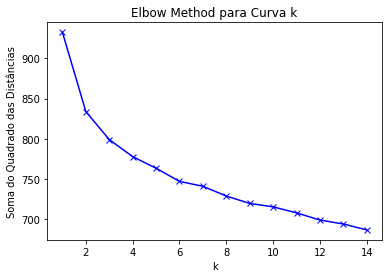

In [40]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Soma do Quadrado das Distâncias')
plt.title('Elbow Method para Curva k')
plt.show()

#### Como você interpreta os resultados parecem favoráveis os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação? 
- Dica.: Para recuperar os centroídes use kmeans.cluster_centers_

#### Resposta
Cada centróide é um vetor que contém um número em que cada a média de uma variável para as observações nesse cluster. Isso permite saber a medida geral da localização do cluster que serve para ajudar a interpretar cada cluster (como os dados estão distribuidos e localizados), ou seja vistos como uma representação da "observação média" de todas as variáveis.

#[ 2.30235988, 1.34660767, 29.49889381, 0.50737463, 0.40560472, 25.2546087, 2.62241888]
#[ 1., 1.70588235, 32.49764706, 0.64705882, 0.97058824, 220.27230294, 2.05882353]

In [41]:
kmeanCentro

array([[  2.31008902,   1.34569733,  29.53004451,   0.50445104,
          0.39614243,  24.69232151,   2.62017804],
       [  1.        ,   1.68421053,  31.62947368,   0.68421053,
          1.07894737, 209.71732368,   2.15789474]])

**Recupere os centroídes e faça um radar chart considerando os centroídes, [veja este exemplo](https://python-graph-gallery.com/391-radar-chart-with-several-individuals/).**
* Dica.: Para recuperar os centroídes use kmeans.cluster_centers_

In [72]:
import plotly.graph_objects as go

categories = ['Pclass','Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[2.30, 1.34, 29.49, 0.50, 0.40, 25.25, 2.62],
      theta=categories,
      fill='toself',
      name='Product A'
))
fig.add_trace(go.Scatterpolar(
      r=[1.00, 1.70, 32.49, 0.64, 0.97, 220.27, 2.05],
      theta=categories,
      fill='toself',
      name='Product B'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 200]
    )),
  showlegend=False
)

fig.show()

#### Recupere as amostras de cada cluster e faça um parallel coordinates, [veja este exemplo](https://python-graph-gallery.com/150-parallel-plot-with-pandas/) ou [este](https://jovianlin.io/data-visualization-seaborn-part-2/). Os resultados parecem favoráveis e os centroídes são de fato distintos? Como você interpreta os dados com base nesta informação? E se compararmos com a informação das amostras considerando o atributo survived?

In [43]:
# Make the plot, Importando bibliotecas
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
import warnings
warnings.filterwarnings("ignore")
df = dfBackUp

In [44]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,3
1,1,2,38.0,1,0,71.2833,1
2,3,2,26.0,0,0,7.9250,3
3,1,2,35.0,1,0,53.1000,3
4,3,1,35.0,0,0,8.0500,3


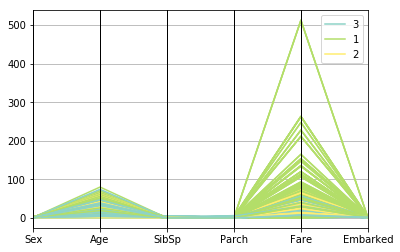

In [45]:
# PLOT
parallel_coordinates(df, 'Pclass', colormap=plt.get_cmap("Set3"))
plt.show()

# Nota

- É muito comum aplicar PCA para reduzir a dimensionalidade dos dados, principalmente quando trabalhamos com aprendizagem não supervisionada. Para isso é necessário interpretar o quanto as componentes explicam a variação nos dados, por exemplo, qual o número de componentes utilizar e o cumulativo total que representa as componentes sobre os dados. Também é preciso explicar como as componenentes se relaciona as variáveis originais do dado, considerando todas as amostras ou parte delas. Nesses dois sites há dicas de como compreender melhor essa interpretação [dica_1](https://support.minitab.com/en-us/minitab/18/help-and-how-to/modeling-statistics/multivariate/how-to/principal-components/interpret-the-results/key-results/) e [dica_2](https://newonlinecourses.science.psu.edu/stat505/node/54/)

#### Crie alguns gráficos, scatterplot do cluster, mostrando os dados definidos pelo cluster.
- Que tal tentar marcar os centroídes neste gráfico? *P.S.: Se você criou o PCA construa o gráfico considerando variações das componentes*

In [46]:
from sklearn.preprocessing import StandardScaler
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [47]:
# separando as features pelos seus valores
X = df.loc[:, features].values

In [48]:
print(X)

[[3 22.0 1 0 7.25 3]
 [1 38.0 1 0 71.2833 1]
 [3 26.0 0 0 7.925 3]
 ...
 [1 19.0 0 0 30.0 3]
 [1 26.0 0 0 30.0 1]
 [3 32.0 0 0 7.75 2]]


In [49]:
x = StandardScaler().fit_transform(X)

In [50]:
print(x)

[[ 0.90859974 -0.52766856  0.52251079 -0.50678737 -0.51637992  0.51958818]
 [-1.48298257  0.57709388  0.52251079 -0.50678737  0.69404605 -2.04948671]
 [ 0.90859974 -0.25147795 -0.55271372 -0.50678737 -0.50362035  0.51958818]
 ...
 [-1.48298257 -0.73481151 -0.55271372 -0.50678737 -0.08633507  0.51958818]
 [-1.48298257 -0.25147795 -0.55271372 -0.50678737 -0.08633507 -2.04948671]
 [ 0.90859974  0.16280796 -0.55271372 -0.50678737 -0.50692839 -0.76494927]]


In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['Principal Coluna UM', 'Principal Coluna DOIS'])

In [52]:
centers = np.array(kmeans_.cluster_centers_)

In [53]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [54]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
principalDf.head()

,Principal Coluna UM,Principal Coluna DOIS
0,-1.301874,-0.050974
1,2.252770,0.321300
2,-1.044499,-0.805745
3,1.022413,0.001213
4,-0.798370,-1.044944


In [56]:
from sklearn.cluster import KMeans

# 2 Clusters DF padrão
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
y_kmeans = kmeans.predict(x)

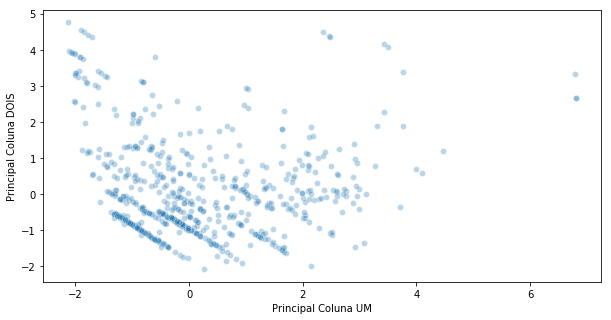

In [57]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="Principal Coluna UM", y="Principal Coluna DOIS",
    palette=sns.color_palette("hls", 10),
    data=principalDf,
    legend="full",
    alpha=0.3
)

In [58]:
####

![conv-only](https://cdn.discordapp.com/attachments/601509344533807107/721794895479570452/unknown.png)

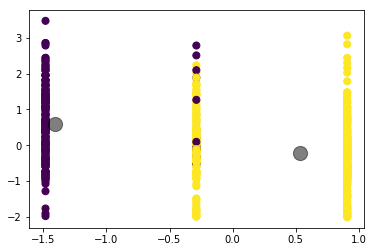

In [60]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=50, cmap='viridis')
#kmeanCentro2 = kmeans.cluster_centers_
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

* **Aplique o DBSCAN e identifique alguns elementos que são considerados como noise**

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
clustering = DBSCAN(eps=3, min_samples=2).fit(X)

In [63]:
clustering

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=2, n_jobs=1, p=None)

In [64]:
clustering.labels_

array([ 0, -1,  0,  1,  0,  2,  3,  0, -1,  3,  4,  0,  5,  0,  0,  6,  0,
        0,  0,  0,  7, -1,  5,  8,  0, -1, -1,  9,  0, 10, 11,  0,  0, -1,
        0, 10, -1,  0, 12,  0, -1,  0,  0,  6, 13,  0, -1,  6,  0,  0, -1,
        0,  0, 13, 14,  0, 15,  0, -1,  0,  0,  0, -1,  0,  0, -1, 16,  0,
        0,  0, -1,  0, 17, -1, -1,  0,  0,  0, 18,  0,  0,  0,  0,  0, 19,
        0,  0,  0,  0,  0, -1,  0, -1,  6, 14, 20,  0, 21, 11,  0,  0,  0,
        0,  0,  0,  0,  0, 22,  1,  0, 23,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0, -1, -1,  0, -1,  0,  0,  0,  0,  0,  0, 24, -1, -1, 25, 26,
        6,  3,  0, 27,  0, -1,  0, 28,  6, 24, 29, 30,  0,  0,  0,  0,  0,
        6, 30, -1,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0, 30, -1,  0,  0,  0,  0, 31,  0,  0,  0,  0, -1,  0, 32,
        6,  0, 30,  6,  0,  0,  0,  0,  0, -1,  0,  0,  1,  4,  0,  4,  0,
       33,  0, 34, 35, 30,  6, 21, 28,  0, 36,  0, -1, 37, -1, 33, -1, -1,
        0,  6,  0, 38,  0

In [69]:
clustering.min_samples

2

In [65]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

Text(0.5,0,'Plot')

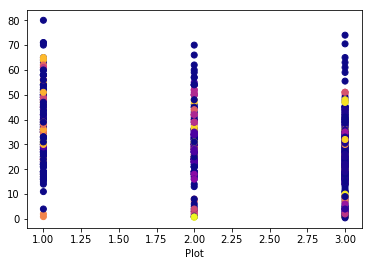

In [68]:
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Plot")

# O DBSCAN tem como objetivo:

    - É caracterizado por um agrupamento espacial de dados com ruído baseado em densidade”.
    - Ele possui capacidade de capturar grupos de formas complexas.
    - Permite identificar pontos que não fazem parte de nenhum cluster (detector de outliers).
    - Pontos que estão dentro de uma região densa são chamados de amostras principais.
    
    # Percepção
    -> Como o conjunto de dados possui alta dimensão o resultado retornado é bastante dificil de analisar e provavelmente incorreto porque os dados disponiveis são repletos de discrepâncias, essa ideia é expressa pelo grau de dimensionalidade dos dados (como estão agrupados)
    